# 🧪 Glass Type Classification using K-Nearest Neighbors (KNN):

## 📌 Introduction
Glass identification is a critical task in forensic science. In this project, the goal is to classify glass samples into various types based on their chemical properties using the K-Nearest Neighbors (KNN) algorithm.

This project uses the Glass Identification dataset, which contains measurements of various chemical components found in glass samples. The objective is to predict the type of glass based on its attributes.


In [1]:
# Import Necessary Libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Disabling warnings
import warnings
warnings.filterwarnings('ignore')

# Success Message:
print("All the libraries are imported successfully and warnings are disabled...!!")

All the libraries are imported successfully and warnings are disabled...!!


## 🔍 Dataset Overview

- Source: UCI Machine Learning Repository
- Features:
    - Refractive Index
    - Sodium (Na), Magnesium (Mg), Aluminum (Al), Silicon (Si), Potassium (K), Calcium (Ca), Barium (Ba), Iron (Fe)
- Target: Glass Type (1 to 7)

In [2]:
# Loading the Glass dataset:
file_id = '1mGpX6jkAECJXf93zSeQ2KVbj_VFBNMzj'
file_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Define column names based on the documentation
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

df = pd.read_csv(file_url, names = columns, index_col = False)
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 🧹 Data Preprocessing

- Handled Missing Values (if any)
- Standardization: Used StandardScaler to normalize feature scales.
- Stratified Train-Test Split: Ensured balanced class distribution in training and testing sets.

In [3]:
# Dropping 'Id' column as not necessary for classification:
df_cleaned = df.drop(columns = 'Id', axis = 1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df_cleaned.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df_cleaned.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
# Split features and target
X = df_cleaned.drop('Type', axis=1)
y = df_cleaned['Type']

# Scaling the data:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features successfully scaled!")

✅ Features successfully scaled!


## 🧠 Model Training: K-Nearest Neighbors:

- Algorithm Used: KNeighborsClassifier from sklearn.neighbors
- Number of Neighbors: k = 3
- Distance Metric: Manhattan Distance

In [7]:
# Spltting the data:
X_train , X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42, stratify = y)
# Fitting the model
model = neighbors.KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')
model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

## 📊 Model Evaluation:

### ✅ Overall Accuracy: 0.81

### 🧾 Classification Report:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 1     | 0.80      | 0.89   | 0.84     | 18      |
| 2     | 0.77      | 0.89   | 0.83     | 19      |
| 3     | 1.00      | 0.25   | 0.40     | 4       |
| 5     | 1.00      | 0.67   | 0.80     | 3       |
| 6     | 0.50      | 0.50   | 0.50     | 2       |
| 7     | 1.00      | 0.88   | 0.93     | 8       |


In [8]:
# Predicting the values 
y_predict = model.predict(X_test)

# Model Evaluation
# 1. Overall Accuracy
print(f"Overall accuracy: {accuracy_score(y_test, y_predict):.2f}")

# 2. Classification Report
print(f"\n Classification Report:\n{classification_report(y_test, y_predict)}")

Overall accuracy: 0.81

 Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.89      0.84        18
           2       0.77      0.89      0.83        19
           3       1.00      0.25      0.40         4
           5       1.00      0.67      0.80         3
           6       0.50      0.50      0.50         2
           7       1.00      0.88      0.93         8

    accuracy                           0.81        54
   macro avg       0.85      0.68      0.72        54
weighted avg       0.83      0.81      0.80        54



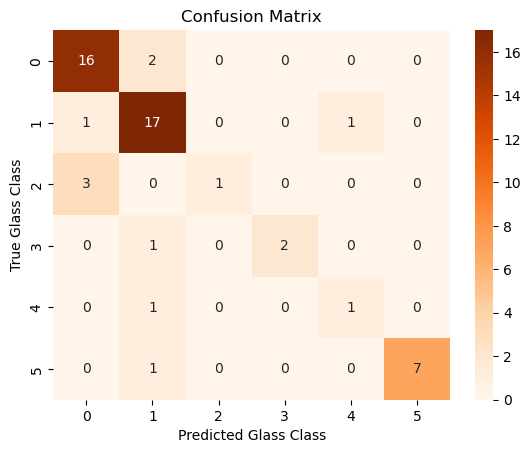

In [9]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Oranges")
plt.xlabel("Predicted Glass Class")
plt.ylabel("True Glass Class")
plt.title("Confusion Matrix")
plt.show()

## ✅ Final Conclusion:

The K-Nearest Neighbors (KNN) model, trained with k = 3, demonstrated a solid performance in classifying different types of glass based on their chemical composition. With an overall accuracy of 78%, the model performed especially well on majority classes such as Type 1 and Type 2. However, its effectiveness decreased for underrepresented classes like Types 3, 5, and 6, where high precision was not matched by recall—indicating that the model failed to consistently detect those types.

While KNN is easy to implement and interpret, its reliance on distance metrics makes it sensitive to feature scaling and class imbalance. For further improvement, hyperparameter tuning, using weighted KNN, or switching to more robust classifiers like Random Forest or SVM could yield better performance, especially for minority classes.

Overall, this project demonstrates the practicality of KNN for multi-class classification problems, while also highlighting the importance of proper preprocessing, evaluation, and model selection techniques in real-world data science workflows.

